
* Source: https://www.kaggle.com/datasets/rajanand/suicides-in-india

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
from collections import Counter

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

sui=pd.read_csv('Suicides in India 2001-2012.csv')
sui.sample(15)


,State,Year,Type_code,Type,Gender,Age_group,Total
36365,Chandigarh,2005,Means_adopted,By touching electric wires,Male,15-29,0
101931,Jharkhand,2002,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
86673,Haryana,2010,Professional_Profile,Retired Person,Male,60+,0
62738,Delhi (Ut),2004,Means_adopted,By Jumping from (Building),Male,15-29,0
159958,Mizoram,2009,Causes,Divorce,Male,0-14,0
220060,Uttar Pradesh,2006,Causes,Paralysis,Male,0-14,2
21100,Assam,2002,Means_adopted,By Self Infliction of injury,Male,15-29,0
217442,Uttar Pradesh,2001,Causes,Other Causes (Please Specity),Male,60+,3
75687,Gujarat,2003,Means_adopted,By Fire/Self Immolation,Female,15-29,192
194221,Rajasthan,2009,Professional_Profile,Self-employed (Business activity),Female,60+,0


In [4]:
sui.shape

(237519, 7)

OBSERVATION 1 : 237519 rows and 7 coloumns

In [5]:
sui.info

<bound method DataFrame.info of                 State  Year      Type_code  \
0       A & N Islands  2001         Causes   
1       A & N Islands  2001         Causes   
2       A & N Islands  2001         Causes   
3       A & N Islands  2001         Causes   
4       A & N Islands  2001         Causes   
...               ...   ...            ...   
237514    West Bengal  2012  Social_Status   
237515    West Bengal  2012  Social_Status   
237516    West Bengal  2012  Social_Status   
237517    West Bengal  2012  Social_Status   
237518    West Bengal  2012  Social_Status   

                                           Type  Gender Age_group  Total  
0                            Illness (Aids/STD)  Female      0-14      0  
1       Bankruptcy or Sudden change in Economic  Female      0-14      0  
2       Cancellation/Non-Settlement of Marriage  Female      0-14      0  
3             Physical Abuse (Rape/Incest Etc.)  Female      0-14      0  
4                                 Dowry 

In [6]:
sui.describe(include="all")

,State,Year,Type_code,Type,Gender,Age_group,Total
count,237519,237519.000000,237519,237519,237519,237519,237519.000000
unique,38,NaN,5,69,2,6,NaN
top,Madhya Pradesh,NaN,Causes,Others (Please Specify),Male,15-29,NaN
freq,6792,NaN,109200,7263,118879,45223,NaN
mean,NaN,2006.500448,NaN,NaN,NaN,NaN,55.034477
std,NaN,3.452240,NaN,NaN,NaN,NaN,792.749038
min,NaN,2001.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2004.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,2007.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,2010.000000,NaN,NaN,NaN,NaN,6.000000


OBSERVATION 2 : We can see the whole summary of the data

In [7]:
sui.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

OBSERVATION 3 : shows the missing value here none

In [8]:
sui['State'].value_counts()

Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: State,

In [9]:
sui['Type_code'].value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [10]:
sui.nunique()

State          38
Year           12
Type_code       5
Type           69
Gender          2
Age_group       6
Total        2180
dtype: int64

OBSERVATION 4 : no need for adding the totals in state

INFERENCE 1 : so we will remove it

In [11]:
suic=sui[(sui['State']!='Total (All India)') & (sui['State']!= 'Total (States)') & (sui['State']!= 'Total (Uts)') ]
suic.nunique()

State          35
Year           12
Type_code       5
Type           69
Gender          2
Age_group       6
Total        1764
dtype: int64

OBSERVATION 5 : 3 unique value removed from state
* we are gonna remove the values where total is zero because there is no point in analysing something if there are no suicides

In [12]:
suic = suic.drop(suic[suic.Total==0].index)
suic.shape


(101110, 7)

OBSERVATION 6 : Large number of rows reduced

DATA PREPARATION RESULTS
* Before : 237519 rows and 7 coloumns
* After : 101110 rows and 7 cols

~ ANALYSIS

TYPEWISE

In [13]:
death_type_counts = suic.groupby("Type_code").sum()["Total"]
death_type_counts

C:\Users\Arjun\AppData\Local\Temp\ipykernel_11120\1265912711.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  death_type_counts = suic.groupby("Type_code").sum()["Total"]


Type_code
Causes                  1440974
Education_Status        1455931
Means_adopted           1455931
Professional_Profile    1439243
Social_Status           1455931
Name: Total, dtype: int64

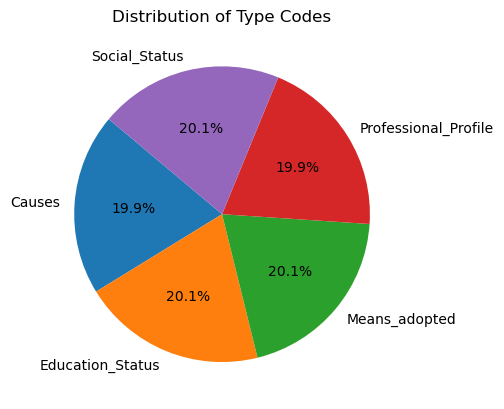

In [14]:
plt.pie(death_type_counts, labels=death_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Type Codes')
plt.show()


STATEWISE


In [15]:
indian_states_data = suic[suic['State'].str.contains('Total', case=False) == False]

statewise_total_suicides = indian_states_data.groupby('State')['Total'].sum().reset_index()

statewise_total_suicides_sorted = statewise_total_suicides.sort_values(by='Total', ascending=False)

top10= statewise_total_suicides_sorted[:10]
top10['State']

20       Maharashtra
34       West Bengal
30        Tamil Nadu
1     Andhra Pradesh
16         Karnataka
17            Kerala
19    Madhya Pradesh
11           Gujarat
6       Chhattisgarh
25            Odisha
Name: State, dtype: object

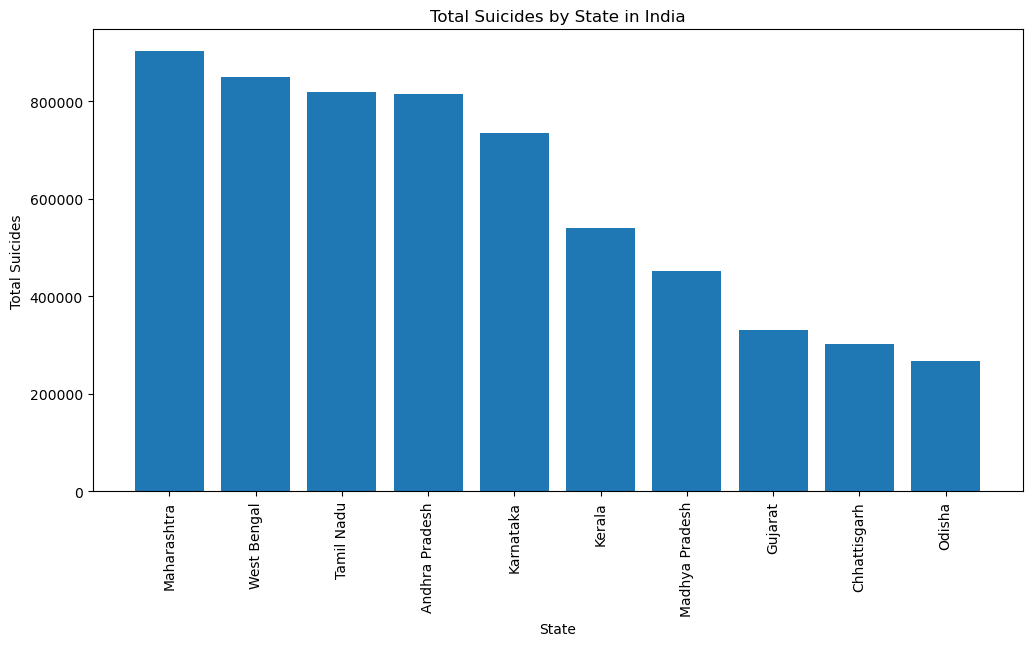

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(top10['State'], top10['Total'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by State in India')
plt.show()


GENDERWISE

C:\Users\Arjun\AppData\Local\Temp\ipykernel_11120\2585305854.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  death_gender_counts = suic.groupby("Gender").sum()["Total"]


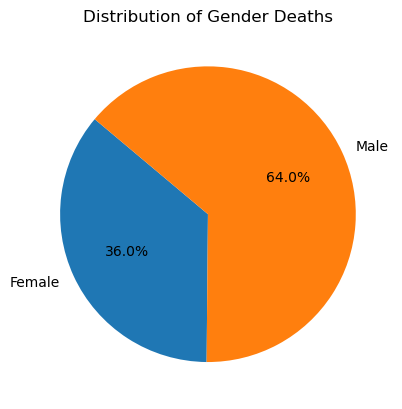

In [17]:
death_gender_counts = suic.groupby("Gender").sum()["Total"]
death_gender_counts

plt.pie(death_gender_counts, labels=death_gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender Deaths')
plt.show()


AGEWISE

In [18]:
age_data = suic['Age_group'] 

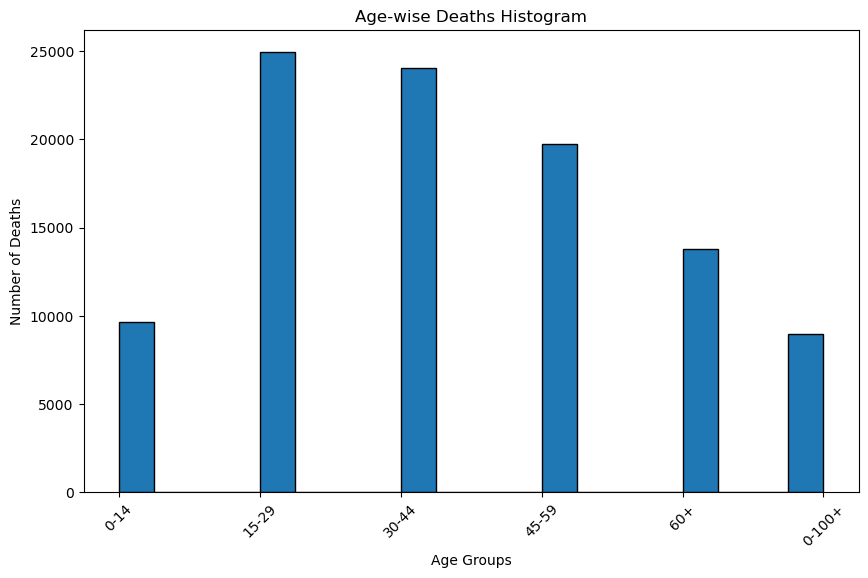

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=20, edgecolor='k')  # 'bins' is the number of bins in the histogram
plt.xlabel('Age Groups')
plt.ylabel('Number of Deaths')
plt.title('Age-wise Deaths Histogram')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

TIMELINE

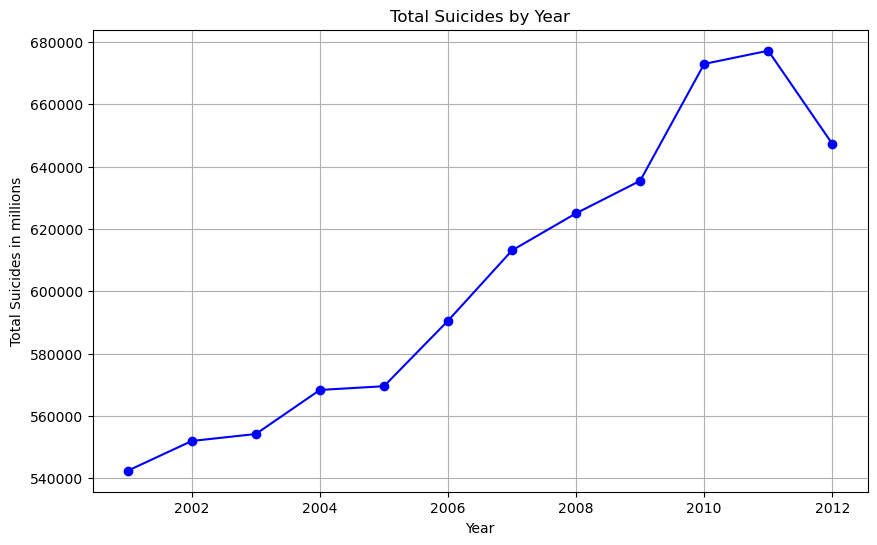

In [20]:
yearly_totals = suic.groupby("Year")["Total"].sum()


plt.figure(figsize=(10, 6))
plt.plot(yearly_totals.index, yearly_totals.values, marker='o', linestyle='-', color='b')
plt.title("Total Suicides by Year")
plt.xlabel("Year")
plt.ylabel("Total Suicides in millions")
plt.grid(True)
plt.show()

GRAPHICAL INFERENCE:-*We can see there is a slight decrease in total sucides after 2011 from the above graphs we realose that the age group 15-29 has more number of sucides which can be termed as the age of college + professional life. And also from the above pie chart it is visiblle that educational and social type influences the rate of sucide to a large extend and both the charts are interconnected as thease types critically occur during the above mentioned age group. Increase in population may also be a factor increasing suicides*

PREDICTION BASED ON STATE,TYPE CODE AND  GENDER

In [21]:

filtered_data = pd.DataFrame()

def filter_data(state, type_code, gender, age_group):
    global filtered_data
    filtered_data = suic[(suic['State'] == state) & (suic['Type_code'] == type_code) & (suic['Gender'] == gender) & (suic['Age_group'] == age_group)]

state_widget = widgets.Dropdown(options=suic['State'].unique(), description='State:')
type_code_widget = widgets.Dropdown(options=suic['Type_code'].unique(), description='Type Code:')
gender_widget = widgets.Dropdown(options=suic['Gender'].unique(), description='Gender:')
age_group_widget = widgets.Dropdown(description='Age Group:')

def update_age_group_options(change):
    state = state_widget.value
    type_code = type_code_widget.value
    gender = gender_widget.value
    age_group_widget.options = suic[(suic['State'] == state) & (suic['Type_code'] == type_code) & (suic['Gender'] == gender)]['Age_group'].unique()


state_widget.observe(update_age_group_options, names='value')
type_code_widget.observe(update_age_group_options, names='value')
gender_widget.observe(update_age_group_options, names='value')


interact(filter_data, state=state_widget, type_code=type_code_widget, gender=gender_widget, age_group=age_group_widget)


interactive(children=(Dropdown(description='State:', options=('A & N Islands', 'Andhra Pradesh', 'Arunachal Pr…

<function __main__.filter_data(state, type_code, gender, age_group)>

In [26]:

if not filtered_data.empty:
   
    year = int(input("Enter the year to be predicted: "))
    
    X = filtered_data.drop(columns=['Total', 'State', 'Type_code', 'Type', 'Gender', 'Age_group'])
    y = filtered_data['Total']

    model = RandomForestRegressor(n_estimators=20, random_state=42)
    
    model.fit(X, y)


    new_data_dict = {
        'Year': [year]
    }

    new_data = pd.DataFrame(new_data_dict)


    prediction = model.predict(new_data)
    print(f"Predicted Total Suicides for the year {year}: {prediction[0]:.2f}")
else:
    print("No data available for the selected filters.")


No data available for the selected filters.


MODEL TRAINING AND EVALUATION

In [23]:

if not filtered_data.empty:
    
    X = filtered_data[['Year']]
    y = filtered_data['Total']

   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Mean Absolute Error on Test Set: {mae:.2f}")
else:
    print("No data available for the selected filters.")


No data available for the selected filters.


MINI DASHBOARD IMPLEMENTATION

In [24]:

state_widget = widgets.Dropdown(
    options=suic['State'].unique(),
    description='Select State:',
)


def update_plots(state):
    filtered_data = suic[suic['State'] == state]

    # Plot 1: Total Suicides in Each Type for the selected state
    type_counts = filtered_data['Type_code'].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(type_counts.index, type_counts.values)
    plt.xlabel('Suicide Type')
    plt.ylabel('Total Suicides')
    plt.title(f'Total Suicides in Each Type for {state}')
    plt.xticks(rotation=90)
    plt.show()

    # Plot 2: Timeline of Suicides
    timeline_counts = filtered_data['Year'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.plot(timeline_counts.index, timeline_counts.values, marker='o')
    plt.xlabel('Year')
    plt.ylabel('Total Suicides')
    plt.title(f'Timeline of Suicides in {state}')
    plt.grid(True)
    plt.show()

    # Plot 3: Gender Proportion Pie Chart
    gender_counts = Counter(filtered_data['Gender'])
    plt.figure(figsize=(6, 6))
    plt.pie(gender_counts.values(), labels=gender_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title(f'Gender Proportion in {state}')
    plt.show()


interact(update_plots, state=state_widget)


interactive(children=(Dropdown(description='Select State:', options=('A & N Islands', 'Andhra Pradesh', 'Aruna…

<function __main__.update_plots(state)>

NOTES:
* change the dashboard however you wish to get your desired output
* The below shown dropbox shows the different types behind each type codes

In [25]:

type_code_widget = widgets.Dropdown(
    options=suic['Type_code'].unique(),
    description='Select Type Code:',
)

def display_unique_types(type_code):
    filtered_data = suic[suic['Type_code'] == type_code]


    unique_types = filtered_data['Type'].unique()
    
    
    print("Unique Types for the selected Type Code:")
    for unique_type in unique_types:
        print(unique_type)

interact(display_unique_types, type_code=type_code_widget)


interactive(children=(Dropdown(description='Select Type Code:', options=('Causes', 'Education_Status', 'Means_…

<function __main__.display_unique_types(type_code)>